<a href="https://colab.research.google.com/github/abhir8008/Pytorch_DeepLearning/blob/master/pytorch_Cats%26Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
from google.colab import drive
drive.mount('/content/drive')
'''

"\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

In [ ]:
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
import cv2

In [ ]:
'''
print(os.listdir("/content/drive/MyDrive/AI/CATS_DOGS/test"))
print(len(os.listdir("/content/drive/MyDrive/AI/CATS_DOGS/train")))
#print(os.listdir("/content/drive/MyDrive/AI/CATS_DOGS/train/CAT"))
print(len(os.listdir("/content/drive/MyDrive/AI/CATS_DOGS/train/CAT")))

img = cv2.imread('/content/drive/MyDrive/AI/CATS_DOGS/train/CAT/1.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img.shape
'''

'\nprint(os.listdir("/content/drive/MyDrive/AI/CATS_DOGS/test"))\nprint(len(os.listdir("/content/drive/MyDrive/AI/CATS_DOGS/train")))\n#print(os.listdir("/content/drive/MyDrive/AI/CATS_DOGS/train/CAT"))\nprint(len(os.listdir("/content/drive/MyDrive/AI/CATS_DOGS/train/CAT")))\n\nimg = cv2.imread(\'/content/drive/MyDrive/AI/CATS_DOGS/train/CAT/1.jpg\')\nimg = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)\nimg.shape\n'

In [ ]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
import torchvision.transforms as transforms
from torchvision.utils import save_image

In [ ]:
'''
from torchvision.transforms.transforms import RandomGrayscale
# Compose is for Composes several transforms together of dataset and 
my_transforms = transforms.Compose([
                                    transforms.Resize((256,256)),
                                    transforms.RandomCrop((256,256)),
                                    transforms.ColorJitter(brightness = 0.5),
                                    transforms.RandomRotation(degrees = 45),
                                    transforms.RandomHorizontalFlip(p = 0.5),
                                    transforms.RandomVerticalFlip(p = 0.05),
                                    transforms.RandomGrayscale( p =0.2),
                                    transforms.ToTensor()
                                    ])
# transforms.Normalize(mean = [0.0,0.0,0.0],std = [1.0,1.0,1.0]) add this after transforms.ToTensor()
# transforms.ToPILImage(), but it will not work as it tarnsform image in PIL 

datasets = ImageFolder("/content/drive/MyDrive/AI/CATS_DOGS/test",transform = my_transforms)
# datasets = ImageFolder("/content/drive/MyDrive/AI/CATS_DOGS/test",transform = ToTensor())
datasets
'''

'\nfrom torchvision.transforms.transforms import RandomGrayscale\n# Compose is for Composes several transforms together of dataset and \nmy_transforms = transforms.Compose([\n                                    transforms.Resize((256,256)),\n                                    transforms.RandomCrop((256,256)),\n                                    transforms.ColorJitter(brightness = 0.5),\n                                    transforms.RandomRotation(degrees = 45),\n                                    transforms.RandomHorizontalFlip(p = 0.5),\n                                    transforms.RandomVerticalFlip(p = 0.05),\n                                    transforms.RandomGrayscale( p =0.2),\n                                    transforms.ToTensor()\n                                    ])\n# transforms.Normalize(mean = [0.0,0.0,0.0],std = [1.0,1.0,1.0]) add this after transforms.ToTensor()\n# transforms.ToPILImage(), but it will not work as it tarnsform image in PIL \n\ndatasets = Image

In [ ]:
from torchvision.transforms.transforms import RandomGrayscale
# Compose is for Composes several transforms together of dataset and 
my_transforms = transforms.Compose([
                                    transforms.Resize((256,256)),
                                    transforms.CenterCrop((224,224)),
                                    transforms.ToTensor(),
                                    ])
# transforms.Normalize(mean = [0.485, 0.456, 0.406],std = [0.229,0.224,0.225]) add this after transforms.ToTensor()
# transforms.ToPILImage(), but it will not work as it tarnsform image in PIL 

datasets = ImageFolder("/content/drive/MyDrive/AI/CATS_DOGS/train",transform = my_transforms)
# datasets = ImageFolder("/content/drive/MyDrive/AI/CATS_DOGS/test",transform = ToTensor())
datasets

Dataset ImageFolder
    Number of datapoints: 18743
    Root location: /content/drive/MyDrive/AI/CATS_DOGS/train
    StandardTransform
Transform: Compose(
               Resize(size=(256, 256), interpolation=bilinear, max_size=None, antialias=None)
               CenterCrop(size=(224, 224))
               ToTensor()
           )

In [ ]:
'''
img,label = datasets[0]
print(img.shape,label)
img
# torch.Size([3, 150, 97]) 1 = [RGB,height,width] 0/1 == cat/dog
'''

'\nimg,label = datasets[0]\nprint(img.shape,label)\nimg\n# torch.Size([3, 150, 97]) 1 = [RGB,height,width] 0/1 == cat/dog\n'

In [ ]:
print(datasets.classes)
print(len(datasets.classes))

['CAT', 'DOG']
2


In [ ]:
import matplotlib.pyplot as plt

def show_example(img,label):
  print('Label: ',datasets.classes[label])
  plt.imshow(img.permute(1,2,0))

Label:  CAT


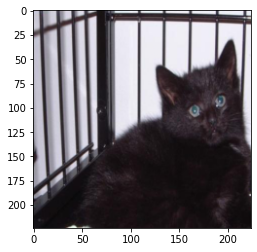

In [ ]:
'''
for i in range(10):
'''
show_example(*datasets[5000])


In [ ]:
import numpy as np
def split_indices(n, val_pct=0.1 , seed = 99):
  #Determine size of validation set
  n_val = int(val_pct * n)
  print(n_val)
  #set the random seed (for reproducibility)
  np.random.seed(seed)
  #Create random permutation of 0 to n-1
  idxs = np.random.permutation(n)
  #pick first n_val indices for validation set
  return idxs[n_val:], idxs[:n_val]


In [ ]:
val_pct = 0.2
rand_seed = 42

train_indices,val_indices = split_indices(len(datasets),val_pct,rand_seed)
print(len(train_indices), len(val_indices))
print('sample validation indices: ', val_indices[:10])
#print('sample validation indices: ', val_indices[:len(val_indices)])

3748
14995 3748
sample validation indices:  [ 5860  4724 16937 13730  3458  4863  8116 10952 11243 16439]


In [ ]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

batch_size = 64

In [ ]:
train_sampler = SubsetRandomSampler(train_indices)
train_dl = DataLoader(datasets,batch_size, sampler = train_sampler)

val_sampler = SubsetRandomSampler(val_indices)
val_dl = DataLoader(datasets,batch_size, sampler = val_sampler)

In [ ]:
from torchvision.utils import make_grid

def show_batch(dl):
  for images, labels in dl:
    fig, ax = plt.subplots(figsize = (100,100))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(make_grid(images, 10).permute(1, 2, 0))
    break

In [ ]:
# show_batch(train_dl)
#stack expects each tensor to be equal size, but got [3, 352, 335] at entry 0 and [3, 405, 500] at entry 1
#reshape all images to run this command

In [ ]:
# show_batch(val_dl)

In [ ]:
#?make_grid

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
'''
simple_model = nn.Sequential(
    nn.Conv2d(3, 64, kernel_size = 3, stride = 1, padding= 1),
    nn.MaxPool2d(2,2)
)
'''

'\nsimple_model = nn.Sequential(\n    nn.Conv2d(3, 64, kernel_size = 3, stride = 1, padding= 1),\n    nn.MaxPool2d(2,2)\n)\n'

In [ ]:
'''
for images,labels in train_dl:
  print('images.shape:',images.shape)
  out = simple_model(images)
  print('out.shape:',out.shape)
  break
'''

"\nfor images,labels in train_dl:\n  print('images.shape:',images.shape)\n  out = simple_model(images)\n  print('out.shape:',out.shape)\n  break\n"

In [ ]:
# ?nn.Conv2d

In [ ]:
'''
model = nn.Sequential(
    nn.Conv2d(3, 64, kernel_size = 3, stride = 1, padding= 0),
    nn.ReLU(),
    nn.MaxPool2d(2,2),   #output: bs x 64 x 128 x 128

    #Activation function brings non linearity

    nn.Conv2d(64, 64, kernel_size = 3, stride = 1, padding= 0),
    nn.ReLU(),
    nn.MaxPool2d(2,2),   #output: bs x 64 x 64 x 64


    nn.Conv2d(64, 64, kernel_size = 3, stride = 1, padding= 0),
    nn.ReLU(),
    nn.MaxPool2d(2,2),  #output: bs x 64 x 32 x 32
    
    nn.Conv2d(64, 128, kernel_size = 3, stride = 1, padding= 0),
    nn.ReLU(),
    nn.MaxPool2d(2,2),   #output: bs x 64 x 16 x 16

    nn.Conv2d(128, 256, kernel_size = 3, stride = 1, padding= 0),
    nn.ReLU(),
    nn.MaxPool2d(2,2),   #output: bs x 64 x 8 x 8

    nn.Conv2d(256, 512, kernel_size = 3, stride = 1, padding= 0),
    nn.ReLU(),
    nn.MaxPool2d(2,2),   #output: bs x 64 x 4 x 4

    nn.Conv2d(512, 1024, kernel_size = 1, stride = 1, padding= 0),
    nn.ReLU(),
    nn.MaxPool2d(2,2),   #output: bs x 64 x 2 x 2

    nn.Conv2d(1024, 2048, kernel_size = 1, stride = 1, padding= 0),
    nn.ReLU(),
    #nn.MaxPool2d(2,2),   #output: bs x 64 x 1 x 1

    nn.Flatten(),
    #nn.Dropout(0.5),
    #nn.Dropout(0.5),
    nn.Linear(2048,2), #try with (64,2) we have 2 output
    
    
   
    # 10 or 1. 1 as we only need 1 output 
   
)
'''

'\nmodel = nn.Sequential(\n    nn.Conv2d(3, 64, kernel_size = 3, stride = 1, padding= 0),\n    nn.ReLU(),\n    nn.MaxPool2d(2,2),   #output: bs x 64 x 128 x 128\n\n    #Activation function brings non linearity\n\n    nn.Conv2d(64, 64, kernel_size = 3, stride = 1, padding= 0),\n    nn.ReLU(),\n    nn.MaxPool2d(2,2),   #output: bs x 64 x 64 x 64\n\n\n    nn.Conv2d(64, 64, kernel_size = 3, stride = 1, padding= 0),\n    nn.ReLU(),\n    nn.MaxPool2d(2,2),  #output: bs x 64 x 32 x 32\n    \n    nn.Conv2d(64, 128, kernel_size = 3, stride = 1, padding= 0),\n    nn.ReLU(),\n    nn.MaxPool2d(2,2),   #output: bs x 64 x 16 x 16\n\n    nn.Conv2d(128, 256, kernel_size = 3, stride = 1, padding= 0),\n    nn.ReLU(),\n    nn.MaxPool2d(2,2),   #output: bs x 64 x 8 x 8\n\n    nn.Conv2d(256, 512, kernel_size = 3, stride = 1, padding= 0),\n    nn.ReLU(),\n    nn.MaxPool2d(2,2),   #output: bs x 64 x 4 x 4\n\n    nn.Conv2d(512, 1024, kernel_size = 1, stride = 1, padding= 0),\n    nn.ReLU(),\n    nn.MaxPool2d(

In [ ]:
'''
model = nn.Sequential(
    nn.Conv2d(3, 16, kernel_size = 3, stride = 1, padding= 1),
    nn.ReLU(),
    nn.MaxPool2d(2,2),   #output: bs x 16 x 16 x 16

    #Activation function brings non linearity


    nn.Conv2d(16, 16, kernel_size = 3, stride = 1, padding= 1),
    nn.ReLU(),
    nn.MaxPool2d(2,2),  #output: bs x 16 x 8 x 8

    nn.Conv2d(16, 16, kernel_size = 3, stride = 1, padding= 1),
    nn.ReLU(),
    nn.MaxPool2d(2,2),  #output: bs x 16 x 4 x 4

    nn.Conv2d(16, 16, kernel_size = 3, stride = 1, padding= 1),
    nn.ReLU(),
    nn.MaxPool2d(2,2), #output: bs x 16 x 2 x 2

    nn.Conv2d(16, 16, kernel_size = 3, stride = 1, padding= 1),
    nn.ReLU(),
    nn.MaxPool2d(2,2), #output: bs x 16 x 1 x 1

    nn.Flatten(), # output: bs x 16


    nn.Dropout(0.5),
    nn.Linear(1024,256),
    nn.ReLU(inplace=True),
    nn.Dropout(0.5),
    nn.Linear(256,64), # output: bs X 1 
    nn.ReLU(inplace=True),
    nn.Linear(64,len(datasets.classes))
   
    # 10 or 2. 2 as we only need 2 output either CAT or DOG 
)
'''

'\nmodel = nn.Sequential(\n    nn.Conv2d(3, 16, kernel_size = 3, stride = 1, padding= 1),\n    nn.ReLU(),\n    nn.MaxPool2d(2,2),   #output: bs x 16 x 16 x 16\n\n    #Activation function brings non linearity\n\n\n    nn.Conv2d(16, 16, kernel_size = 3, stride = 1, padding= 1),\n    nn.ReLU(),\n    nn.MaxPool2d(2,2),  #output: bs x 16 x 8 x 8\n\n    nn.Conv2d(16, 16, kernel_size = 3, stride = 1, padding= 1),\n    nn.ReLU(),\n    nn.MaxPool2d(2,2),  #output: bs x 16 x 4 x 4\n\n    nn.Conv2d(16, 16, kernel_size = 3, stride = 1, padding= 1),\n    nn.ReLU(),\n    nn.MaxPool2d(2,2), #output: bs x 16 x 2 x 2\n\n    nn.Conv2d(16, 16, kernel_size = 3, stride = 1, padding= 1),\n    nn.ReLU(),\n    nn.MaxPool2d(2,2), #output: bs x 16 x 1 x 1\n\n    nn.Flatten(), # output: bs x 16\n\n\n    nn.Dropout(0.5),\n    nn.Linear(1024,256),\n    nn.ReLU(inplace=True),\n    nn.Dropout(0.5),\n    nn.Linear(256,64), # output: bs X 1 \n    nn.ReLU(inplace=True),\n    nn.Linear(64,len(datasets.classes))\n   \n  

In [ ]:
# alexnet

from torchvision import models
#dir(models)  #all the pretrained models

alexnet = models.alexnet(pretrained = True)
alexnet

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
model = nn.Sequential(
    nn.Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2)),
    nn.ReLU(inplace=True),
    nn.MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False),


    nn.Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2)),
    nn.ReLU(inplace=True),
    nn.MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False),

    nn.Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
    nn.ReLU(inplace=True),

    nn.Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
    nn.ReLU(inplace=True),

    nn.Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
    nn.ReLU(inplace=True),
    nn.MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False),

    nn.AdaptiveAvgPool2d(output_size=(6, 6)),

    nn.Flatten(),
    nn.Dropout(p=0.5, inplace=False),
    nn.Linear(in_features=9216, out_features=4096, bias=True),
    nn.ReLU(inplace=True),
    nn.Dropout(p=0.5, inplace=False),
    nn.Linear(in_features=4096, out_features=1024, bias=True),
    nn.ReLU(inplace=True),
    nn.Linear(in_features=1024, out_features=2, bias=True)
   
    # 10 or 2. 2 as we only need 2 output either CAT or DOG 
   
) # mat1 and mat2 shapes cannot be multiplied (98304x6 and 9216x4096)

In [ ]:
model[10].weight.shape

torch.Size([256, 256, 3, 3])

In [ ]:
'''
import torch.quantization

qat_model = torch.quantization.quantize_dynamic(
    model,
    {torch.nn.Linear},
    dtype = torch.qint8)
'''

'\nimport torch.quantization\n\nqat_model = torch.quantization.quantize_dynamic(\n    model,\n    {torch.nn.Linear},\n    dtype = torch.qint8)\n'

In [ ]:
'''
def print_size_of_model(model, label = ""):
  torch.save(model.state_dict(),"temp.p")
  size = os.path.getsize("temp.p")
  print("model:",label,'\t','Size (KB):',size/1e3)
  os.remove('temp.p')
  return size

f = print_size_of_model(model,"fp32")
q = print_size_of_model(qat_model,"int8")
'''

'\ndef print_size_of_model(model, label = ""):\n  torch.save(model.state_dict(),"temp.p")\n  size = os.path.getsize("temp.p")\n  print("model:",label,\'\t\',\'Size (KB):\',size/1e3)\n  os.remove(\'temp.p\')\n  return size\n\nf = print_size_of_model(model,"fp32")\nq = print_size_of_model(qat_model,"int8")\n'

In [ ]:
'''
import torchvision 

# model = torchvision.models.quantization.mobilenet_v2(pretrained=True, quantize=True)
# model_no_quant = torchvision.models.mobilenet_v2(pretrained=True)


def get_model_size(modl):
    torch.save(modl.state_dict(), "demo.pt")
    print("%.5f MB" %(os.path.getsize("demo.pt")/1e6))

# os.remove('demo.pt')
get_model_size(model)

# get_model_size(model_no_quant)
'''

'\nimport torchvision \n\n# model = torchvision.models.quantization.mobilenet_v2(pretrained=True, quantize=True)\n# model_no_quant = torchvision.models.mobilenet_v2(pretrained=True)\n\n\ndef get_model_size(modl):\n    torch.save(modl.state_dict(), "demo.pt")\n    print("%.5f MB" %(os.path.getsize("demo.pt")/1e6))\n\n# os.remove(\'demo.pt\')\nget_model_size(model)\n\n# get_model_size(model_no_quant)\n'

In [ ]:
# def cal_Linear_input_val():
#  (n+2*p-f)/s

In [ ]:
#model

In [ ]:
'''
print(model[12])
model[6].weight

model[6].weight.shape # 0 is the layer number
'''

'\nprint(model[12])\nmodel[6].weight\n\nmodel[6].weight.shape # 0 is the layer number\n'

In [ ]:
'''
if torch.cuda.is_available():
    model.cuda()
'''

'\nif torch.cuda.is_available():\n    model.cuda()\n'

In [ ]:

for images,labels in train_dl:
  print('images.shape:',images.shape)
  out = model(images)
  print('out.shape:',out.shape)
  print('out[0]:',out[0])
  break


images.shape: torch.Size([64, 3, 224, 224])
out.shape: torch.Size([64, 2])
out[0]: tensor([ 0.0147, -0.0171], grad_fn=<SelectBackward0>)


In [ ]:
  F.softmax(out[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """Entry point for launching an IPython kernel.


tensor([0.5080, 0.4920], grad_fn=<SoftmaxBackward0>)

In [ ]:
probs = F.softmax(out[0], dim = 0)
torch.sum(probs), probs
print(torch.sum(probs))
torch.max(probs)

tensor(1., grad_fn=<SumBackward0>)


tensor(0.5080, grad_fn=<MaxBackward1>)

CAT
CAT
Label:  CAT


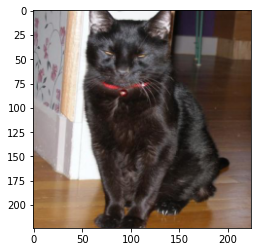

In [ ]:
print(datasets.classes[labels[0]])
print(datasets.classes[0])
show_example(images[0], labels[0])

In [ ]:
datasets.classes

['CAT', 'DOG']

In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [ ]:
device = get_default_device()
device

device(type='cuda')

In [ ]:
train_dl = DeviceDataLoader(train_dl,device)
valid_dl = DeviceDataLoader(train_dl,device)
to_device(model, device)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (4): ReLU(inplace=True)
  (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU(inplace=True)
  (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): ReLU(inplace=True)
  (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (13): AdaptiveAvgPool2d(output_size=(6, 6))
  (14): Flatten(start_dim=1, end_dim=-1)
  (15): Dropout(p=0.5, inplace=False)
  (16): Linear(in_features=9216, out_features=4096, bias=True)
  (17): ReLU(inplace=True)
  (18): Dropout(p=0.5

In [ ]:
def loss_batch(model, loss_func, xb, yb, opt = None, metric = None):
  #Generate predictions
  preds = model(xb)
  #Calculate loss
  loss = loss_func(preds, yb)

  if opt is not None:
    # compute gradients
    loss.backward()
    # Update parameters
    opt.step()
    # Reset gradients
    opt.zero_grad()

  metric_result = None
  if metric is not None:
    # Compute the metric
    metric_result = metric(preds, yb)

  return loss.item(), len(xb), metric_result



In [ ]:
 
def evaluate(model, loss_fn, valid_dl, metric = None):
  with torch.no_grad():
    #pass each batch through the model
    results = [loss_batch(model, loss_fn, xb, yb, metric = metric )
                for xb,yb in valid_dl]

    # Separate losses, counts and metrics
    losses, nums, metrics = zip(*results)
    #Total size of the dataset
    total = np.sum(nums)
    # Avg. loss across batches
    avg_loss = np.sum(np.multiply(losses, nums))/ total
    avg_metric = None
    if metric is not None:
      # Avg. of metric acriss batches
      avg_metric = np.sum(np.multiply(metrics, nums)) / total

  return avg_loss, total, avg_metric


In [ ]:
'''
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)


    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history
'''
   

"\n@torch.no_grad()\ndef evaluate(model, val_loader):\n    model.eval()\n    outputs = [model.validation_step(batch) for batch in val_loader]\n    return model.validation_epoch_end(outputs)\n\ndef fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):\n    history = []\n    optimizer = opt_func(model.parameters(), lr)\n\n\n    for epoch in range(epochs):\n        # Training Phase \n        model.train()\n        train_losses = []\n        for batch in train_loader:\n            loss = model.training_step(batch)\n            train_losses.append(loss)\n            loss.backward()\n            optimizer.step()\n            optimizer.zero_grad()\n        # Validation phase\n        result = evaluate(model, val_loader)\n        result['train_loss'] = torch.stack(train_losses).mean().item()\n        model.epoch_end(epoch, result)\n        history.append(result)\n    return history\n"

In [ ]:

def fit(epochs, model, loss_fn, train_dl, valid_dl,
        opt_fn=None, lr = None, metric = None):
  train_acc,train_losses, val_losses, val_metrics = [],[],[],[]

  #Instantiate the optimizer
  if opt_fn is None: opt_fn = torch.optim.SGD
  opt = opt_fn(model.parameters(),lr = lr)

  for epoch in range(epochs):
    #training
    model.train()
    for xb,yb in train_dl:
      train_loss,_,_ = loss_batch(model, loss_fn, xb,yb,opt)
      train_result = evaluate(model, loss_fn, train_dl,metric)

      #Evaluation
      model.eval()
      result = evaluate(model, loss_fn, valid_dl,metric)
      val_loss, total, val_metric = result

      # Record the loss & metric
      train_losses.append(train_loss)
      val_losses.append(val_loss)
      val_metrics.append(val_metric)

      #print progess
      if metric is None:
        print('Epoch [{}/{},train_loss: {:4f}, val_loss: {:.4f}'
              .format(epoch+1, epochs, train_loss, val_loss))
      else:
        print('Epoch [{}/{}], train_loss: {:.4f}, val_loss: {:.4f}, val_{}: {:.4f}'
              .format(epoch+1, epochs, train_loss, val_loss, metric.__name__, val_metric))
        
  return train_losses, val_losses, val_metrics



In [ ]:
def accuracy(outputs, labels):
  _, preds = torch.max(outputs, dim = 1)
  return torch.sum(preds == labels).item() /len(preds)
  #return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [ ]:
val_loss, _, val_acc = evaluate(model, F.cross_entropy, valid_dl, metric = accuracy)
print('Loss: {:.4f}, Accuracy: {:.4f}'.format(val_loss,val_acc))

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

Loss: 0.6934, Accuracy: 0.4996


In [ ]:
num_epochs = 1
opt_fn = torch.optim.Adam
lr = 0.01

In [ ]:
history = fit(num_epochs, model, F.cross_entropy,
              train_dl, valid_dl, opt_fn, lr, accuracy)
train_losses, val_losses, val_metrics = history

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

Epoch [1/1], train_loss: 0.6936, val_loss: 570675.9435, val_accuracy: 0.5004
Epoch [1/1], train_loss: 520227.3750, val_loss: 336.6380, val_accuracy: 0.4996
Epoch [1/1], train_loss: 312.1000, val_loss: 341.0049, val_accuracy: 0.4996
Epoch [1/1], train_loss: 368.5327, val_loss: 20.8366, val_accuracy: 0.5004
Epoch [1/1], train_loss: 20.6548, val_loss: 3206.5186, val_accuracy: 0.4996
Epoch [1/1], train_loss: 2750.1084, val_loss: 42.8082, val_accuracy: 0.4996
Epoch [1/1], train_loss: 30.2342, val_loss: 149.2448, val_accuracy: 0.4996
Epoch [1/1], train_loss: 154.3058, val_loss: 1.2987, val_accuracy: 0.5004
Epoch [1/1], train_loss: 0.9207, val_loss: 5425.1048, val_accuracy: 0.5004
Epoch [1/1], train_loss: 5478.1509, val_loss: 32.2062, val_accuracy: 0.5004
Epoch [1/1], train_loss: 30.4983, val_loss: 55.2741, val_accuracy: 0.4996
Epoch [1/1], train_loss: 47.5405, val_loss: 3.2982, val_accuracy: 0.5004
Epoch [1/1], train_loss: 2.8418, val_loss: 27.7768, val_accuracy: 0.4996
Epoch [1/1], train_lo

In [ ]:
def plot_metrics(metrics_values):
  ''' Plot meetrics values in a line graph'''
  plt.plot(metrics_values, '-x')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.title('accuracy vs No. of epochs')

In [ ]:
plot_metrics([val_acc] + val_metrics)

In [ ]:
def plot_losses(train_losses, val_losses):
  plt.plot(train_losses, '-x')
  plt.plot(val_losses, '-o')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend(['Training','Validation'])
  plt.title('Loss vs No. of epochs')

In [ ]:
plot_losses([None] + train_losses, [val_loss] + val_losses)